In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.decomposition import PCA as sklearn_pca
import locale
from locale import atof
import warnings
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import xlrd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV

D:\Users\Borja.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Import FBI Raw Data

fbidata = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv', delimiter=",", thousands=',',decimal=".")
fbiraw = pd.DataFrame(fbidata)
fbiraw.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [3]:
#Transform FBI Raw Data
#Rename columns with row 3 from the original data set
fbiraw_t1 = fbiraw.rename(columns=fbiraw.iloc[3])

#Delete first three rows don´t contain data for the regression model
fbiraw_t2 = fbiraw_t1.drop(fbiraw_t1.index[0:4])

In [4]:
#Delete column "Rape (revised definition)1 as it contains no data
fbiraw_t2 = fbiraw_t2.drop('Rape\n(revised\ndefinition)1', axis = 1)

In [5]:
#Delete Arson Column as there is insufficient data
# 'The FBI does not publish arson data unless it receives data from either the agency or the state
#  for all 12 months of the calendar year.'
fbiraw_t2 = fbiraw_t2.drop('Arson3', axis = 1)

In [6]:
#Clean tail from the data set

#Re-shape dataset excluding the last 3 rows of the dataset as they don´t contain relevant information for the model
fbiraw_t2 = fbiraw_t2[:-3]

#Change names in Columns
fbiraw_t2= fbiraw_t2.rename(columns={'Violent\ncrime': 'Violent Crime', 'Murder and\nnonnegligent\nmanslaughter': 'Murder','Rape\n(legacy\ndefinition)2': 'Rape', 'Robbery': 'Robbery', 'Aggravated\nassault': 'Assault', 'Property\ncrime': 'PropertyCrime', 'Burglary': 'Burglary', 'Larceny-\ntheft': 'Larceny & Theft', 'Motor\nvehicle\ntheft': 'MotorVehicleTheft'})

In [7]:
#Analyse missing information
fbiraw_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 4 to 351
Data columns (total 11 columns):
City                 348 non-null object
Population           348 non-null object
Violent Crime        348 non-null object
Murder               348 non-null object
Rape                 348 non-null object
Robbery              348 non-null object
Assault              348 non-null object
PropertyCrime        348 non-null object
Burglary             348 non-null object
Larceny & Theft      348 non-null object
MotorVehicleTheft    348 non-null object
dtypes: object(11)
memory usage: 32.6+ KB


In [8]:
#Change all columns from object to float
locale.setlocale(locale.LC_NUMERIC, '')
fbiraw_t2['Population'] = fbiraw_t2['Population'].apply(atof)
fbiraw_t2['Violent Crime'] = fbiraw_t2['Violent Crime'].apply(atof)
fbiraw_t2['Murder'] = fbiraw_t2['Murder'].apply(atof)
fbiraw_t2['Rape'] = fbiraw_t2['Rape'].apply(atof)
fbiraw_t2['Robbery'] = fbiraw_t2['Robbery'].apply(atof)
fbiraw_t2['Assault'] = fbiraw_t2['Assault'].apply(atof)
fbiraw_t2['PropertyCrime'] = fbiraw_t2['PropertyCrime'].apply(atof)
fbiraw_t2['Burglary'] = fbiraw_t2['Burglary'].apply(atof)
fbiraw_t2['Larceny & Theft'] = fbiraw_t2['Larceny & Theft'].apply(atof)
fbiraw_t2['MotorVehicleTheft'] = fbiraw_t2['MotorVehicleTheft'].apply(atof)
fbiraw_t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 4 to 351
Data columns (total 11 columns):
City                 348 non-null object
Population           348 non-null float64
Violent Crime        348 non-null float64
Murder               348 non-null float64
Rape                 348 non-null float64
Robbery              348 non-null float64
Assault              348 non-null float64
PropertyCrime        348 non-null float64
Burglary             348 non-null float64
Larceny & Theft      348 non-null float64
MotorVehicleTheft    348 non-null float64
dtypes: float64(10), object(1)
memory usage: 32.6+ KB


In [9]:
#Reindex the dataframe

fbiraw_t3 = fbiraw_t2.reset_index(drop=True)
fbiraw_t2.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,PropertyCrime,Burglary,Larceny & Theft,MotorVehicleTheft
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0
7,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0


In [10]:
#Extract only the columns that are needed

fbiraw_t3 = fbiraw_t2

In [11]:
#Eliminate outliers

#fbiraw_t3 = fbiraw_t3[fbiraw_t3.PropertyCrime < 450].reset_index(drop=True)

#Describe the dataset
fbiraw_t3.describe()

,Population,Violent Crime,Murder,Rape,Robbery,Assault,PropertyCrime,Burglary,Larceny & Theft,MotorVehicleTheft
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000


In [12]:
#Print length of dataset and sort values by Population to see how many datapoints are excluded
print(len(fbiraw_t3), len(fbiraw_t2) - len(fbiraw_t3))
fbiraw_t3.sort_values('PropertyCrime',ascending=False).head()

348 0


,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,PropertyCrime,Burglary,Larceny & Theft,MotorVehicleTheft
220,New York,8396126.0,52384.0,335.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0
39,Buffalo,258789.0,3249.0,47.0,145.0,1322.0,1735.0,12491.0,3458.0,8076.0,957.0
276,Rochester,210562.0,2107.0,42.0,92.0,918.0,1055.0,10051.0,2587.0,6855.0,609.0
314,Syracuse,143834.0,1192.0,21.0,75.0,400.0,696.0,6473.0,1781.0,4298.0,394.0
7,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0


In [13]:
#Convert Robbery into a categorical feature

fbiraw_t3.loc[fbiraw_t3['Robbery'] > 0, 'Robbery'] = 1

In [14]:
#Convert Murder into a categorical feature

fbiraw_t3.loc[fbiraw_t3['Murder'] > 0, 'Murder'] = 1

In [15]:
#Transform dataset into final dataset with features

fbidata = fbiraw_t3.drop('City',axis=1)

In [16]:
#Create new features
#10
fbidata['logpopulation'] = np.log(fbidata.Population)
#11
fbidata['TotalCrime'] = np.sqrt(fbidata['Violent Crime']*fbidata['PropertyCrime']+1)
#12
fbidata['PropertyCrimeperAssault'] = fbidata['PropertyCrime']*(fbidata['Assault']+1)
#13
fbidata['Theft'] = np.sqrt(fbidata['Larceny & Theft']*fbidata['MotorVehicleTheft'])
#14
fbidata['Unit Larceny & Theft'] = (fbidata['Larceny & Theft']/fbidata['Population'])*100
#14
fbidata['logviolentcrimes'] = np.log(fbidata['Violent Crime']+1)

In [17]:
names = fbidata.columns
fbidata_scaled = pd.DataFrame(preprocessing.scale(fbidata), columns = names)

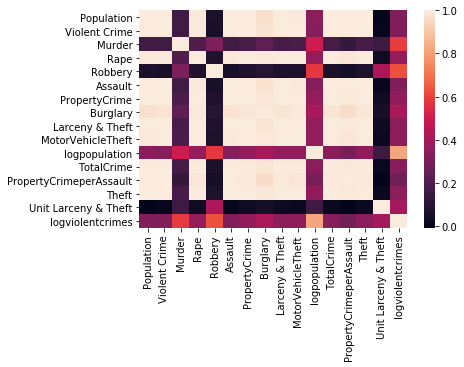

In [18]:
sns.heatmap(fbidata_scaled.corr())
plt.show()

In [19]:
#Set up the outcome variable and predictors

y = fbidata['Murder']

#Iteration1: X = fbidata_scaled[['Population', 'Violent Crime','Rape','Robbery','Assault', 'PropertyCrime','Burglary','Larceny & Theft','MotorVehicleTheft','logpopulation','TotalCrime','PropertyCrimeperAssault','Theft','Unit Larceny & Theft','logviolentcrimes']]

#Iteration 2: X = fbidata_scaled[['Rape','Robbery','Burglary','logpopulation','PropertyCrimeperAssault']]

#Iteration 3: X = fbidata_scaled[['Rape','Burglary','logpopulation']]

#Iteration 4:

X = fbidata_scaled[['Robbery','Rape','Burglary']]

names = ['Robbery','Rape','Burglary']

In [20]:
#Initiating the cross validation generator, N splits = 10

kf = KFold(3)

In [21]:
# Declare a logistic regression classifier.
lr = LogisticRegression(C=1)

# Fit the model.
fit = lr.fit(X, y)

print(fit.coef_)
print(fit.intercept_)
cross_val_score(lr, X, y, cv=kf).mean()

[[ 1.18485925  1.91553687  2.75707137]]
[-2.07357704]


0.88218390804597702

In [22]:
# Build up the correlation mtrix
Z = X
correlation_matrix = Z.corr()

In [23]:
#Eigenvectores & Eigenvalues

eig_vals, eig_vecs = np.linalg.eig(correlation_matrix)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_vals)):
    eigvecs = eig_vecs[:, i].reshape(1, len(X.columns)).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvecs))
    print('Eigenvalue {}: {}'.format(i + 1, eig_vals[i]))
    print(40 * '-')


sklearn_pca = PCA(n_components=len(X.columns))
Y_sklearn = sklearn_pca.fit_transform(correlation_matrix)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

Eigenvector 1: 
[[ 0.12183621]
 [ 0.70117452]
 [ 0.70250284]]
Eigenvalue 1: 2.007622915606636
----------------------------------------
Eigenvector 2: 
[[ 0.9924268 ]
 [-0.09722034]
 [-0.07508168]]
Eigenvalue 2: 0.9850605604280773
----------------------------------------
Eigenvector 3: 
[[-0.01565221]
 [-0.70633031]
 [ 0.70770934]]
Eigenvalue 3: 0.007316523965286283
----------------------------------------
The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [  9.99870923e-01   1.29076915e-04   4.55120330e-34]


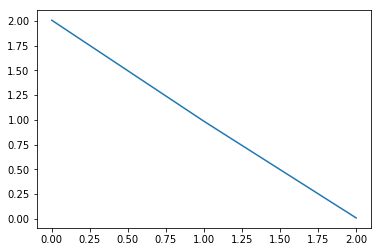

In [24]:
#From the Scree plot.

plt.plot(eig_vals)
plt.show()

In [25]:
# create the RFE model and select features

nfeatures = (len(X.columns))
rfe = RFE(lr,nfeatures)
fit = rfe.fit(X,y)

# summarize the selection of the features

result_RFE = pd.DataFrame(list(zip(X.head(0), rfe.ranking_, rfe.support_)),columns=['Features','Ranking','Support'] )
result_RFE.sort_values('Ranking')

,Features,Ranking,Support
0,Robbery,1,True
1,Rape,1,True
2,Burglary,1,True


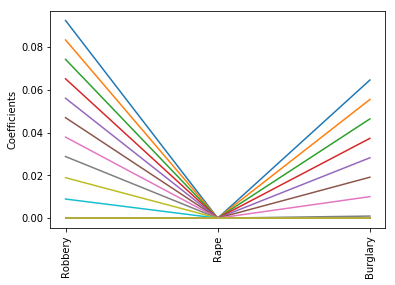

In [26]:
#Feature Selection using Lasso


for lambd in [x * 0.01 for x in range(1, 100)]:
    lasso = Lasso(alpha=lambd)
    lasso_coef = lasso.fit(X, y).coef_
    plt.xticks(range(len(names)), names, rotation=90)
    plt.ylabel('Coefficients')
    plt.plot(range(len(names)), lasso_coef)

plt.show()

***Lasso feature selection shows that 'logpopulation','Unit Larceny & Theft' & 'logviolentcrimes' are the most significant features***

#### Cross Validation - KFold

##### Vanilla Logistic Regression

In [35]:
# Store estimates

scores = np.append(cross_val_score(lr, X, y, cv=kf).mean(),[0])

#Run the model for many alphas

for lambd in range(1, 10):
    lr = LogisticRegression(C=lambd)
    lr.fit(X, y)
    scores = np.row_stack((
        scores,
        np.append(cross_val_score(lr, X, y, cv=kf).mean(),[lambd])))

#Make the data pretty

scores_df = pd.DataFrame(
    scores,columns = ['R2','lambda'])
scores_df.sort_values(by='lambda', inplace=True, ascending=True)
scores_df

,R2,lambda
0,0.890805,0.0
1,0.882184,1.0
2,0.887931,2.0
3,0.887931,3.0
4,0.885057,4.0
5,0.887931,5.0
6,0.890805,6.0
7,0.890805,7.0
8,0.890805,8.0
9,0.890805,9.0


Text(0,0.5,'R2')

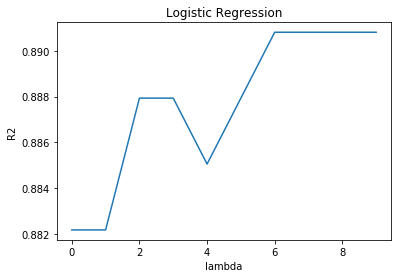

In [28]:
#Plot changes in R2 vs C

plt.plot(scores_df['lambda'], scores_df['R2'])
plt.title('Logistic Regression')
plt.xlabel('lambda')
plt.ylabel('R2')

#### Ridge regression

In [29]:
# Declare a Ridge regression classifier.

ridgeregr = Ridge(alpha = 9) 

# Fit the model.
fit = ridgeregr.fit(X, y)
print(fit.coef_)
print(fit.intercept_)
cross_val_score(ridgeregr, X, y, cv=kf).mean()

[ 0.09671951 -0.14069517  0.20854314]
0.140804597701


-0.7912169579526237

In [30]:
# Prepare Ridge Regression

# Store estimates

scores = np.append(cross_val_score(ridgeregr, X, y, cv=kf).mean(),[0])

#Run the model for many alphas

for lambd in range(1, 100):
    ridgeregr = Ridge(alpha=lambd)
    ridgeregr.fit(X, y)
    scores = np.row_stack((
        scores,np.append(cross_val_score(ridgeregr, X, y, cv=kf).mean(),[lambd])))
 
# Make the data pretty
scores_df = pd.DataFrame(
    scores,columns = ['R2','lambd'])
scores_df.sort_values(by='lambd', inplace=True, ascending=True)

Text(0,0.5,'R2')

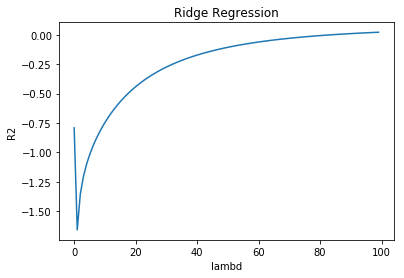

In [31]:
#Plot changes in R2 vs lambda

plt.plot(scores_df['lambd'], scores_df['R2'])
plt.title('Ridge Regression')
plt.xlabel('lambd')
plt.ylabel('R2')

#### Lasso regression

In [32]:
# Declare a Lasso regression classifier.

lass = linear_model.Lasso(alpha = 0.01 )

# Fit the model.
fit = lass.fit(X, y)
print(fit.coef_)
print(fit.intercept_)
cross_val_score(lass, X, y, cv=kf).mean()

[ 0.09259746 -0.          0.0647101 ]
0.140804597701


-0.41248915167489902

In [33]:
# Prepare Lasso Regression

# Store estimates

scores = np.append(cross_val_score(lass, X, y, cv=kf).mean(),[0])

#Run the model for many alphas

for lambd in [x * 0.01 for x in range(1, 10)]:
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X, y)
    scores = np.row_stack((
        scores,
        np.append(cross_val_score(lass, X, y, cv=kf).mean(),[lambd])))
    
#Make the data pretty

scores_df = pd.DataFrame(
    scores,columns = ['R2','lambd'])
scores_df.sort_values(by='lambd', inplace=True, ascending=True)

Text(0,0.5,'R2')

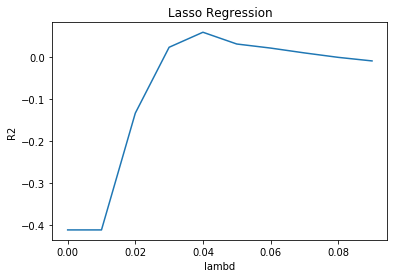

In [34]:
#Plot changes in R2 vs lambda

plt.plot(scores_df['lambd'], scores_df['R2'])
plt.title('Lasso Regression')
plt.xlabel('lambd')
plt.ylabel('R2')

#### Evaluate all three models and decide on your best.
***Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three.***

From the three models I would choose the model based on the cross-validation score. In this case, the best model would be the Ridge Regression with an alpha of 9 giving a R2 = 80% approx. The Logistic Regression gives a value of 89% with a C of 6 and the Lasso regression, to achieve the max R2 requires to have an alhpa that is closer to an OLS.

The selected features have been: ['Robbery','Rape','Burglary']. They have been chosen considering the increase of information that they bring to R2.

Models have been evaluated following the R2 criteria

***Also reflect on the strengths and limitations of regression as a modeling approach.***

Were there things you couldn't do but you wish you could have done?